# Data Cleaning
Ryan S. Russon
ID: 010337779
12/28/2023
Western Governors University
 
## Part I: Research Question

### A. Research Question/Decision

What factors contribute most to customer monthly charges in our telecom service? Understanding these factors and how they contribute to monthly customer charges can help develop strategies to improve business profits.

### B. Description of Variables

The dataset contains the following variables:

* CaseOrder (Integer): Unique order number. 3.
* Customer_id (String): Unique identifier for each customer. K409198.
* Interaction (String): Identifier for customer interactions. Aa90260b-4141-4a24-8e36-b04ce1f4f77b.
* City (String): Geographic location details. Point Baker.
* State (String): Geographic location details. AK.
* County (String): Geographic location details. Ogemaw.
* Zip (Integer): Postal code. 99927.
* Lat (Float): Latitude coordinates. 56.251.
* Lng (Float): Longitude coordinates. -133.37571.
* Population (Integer): Population in the customer's area. 10446.
* Area (String): Type of area (Urban/Rural). Urban.
* Timezone (String): Time zone of the customer's location. America/Sitka.
* Job (String): Customer's occupation. Surveyor.
* Children (Integer): Demographic details. 4.
* Age (Integer): Demographic details. 68.
* Education (String): Highest education achieved. Master’s Degree.
* Income (Float): Demographic details. 28561.99.
* Marital (String): Marital status. Widowed.
* Gender (String): Gender. Male.
* Churn (String): Whether the customer churned or not. No.
* Outage_sec_perweek (Float): Average weekly outage duration in seconds. 10.2179.
* Email (Integer): Contact’s email count. 10.
* Contacts (Integer): Contact count. 3.
* Yearly_equip_failure (Integer): Equipment failure details. 1.
* Techie (String): Service-related data. Yes.
* Contract (String): Contract length. One year.
* Port_modem (String): Port option. Yes.
* Tablet (String): Tablet use. Yes.
* InternetService (String): Specific internet used. DSL.
* Phone (String): Yes/No phone available. Yes.
* Multiple (String): Yes/No. No.
* OnlineSecurity (String): Service-related features. Yes.
* OnlineBackup	(String): Back-up availability. No.
* DeviceProtection (String): Protection available. Yes.
* TechSupport (String): Tech support is available. No.
* StreamingTV (String): Streaming option. Yes.
* StreamingMovies (String): Streaming (movie) option. No.
* PaperlessBilling (String): Paperless billing. Yes.
* PaymentMethod (String): Payment option. Credit Card.
* Tenure	(Float): Tenure or time as a member. 1.156681.
* MonthlyCharge (Float): Monthly charge. 242.948.
* Bandwidth_GB_Year (Float): Data used yearly. 1948.694.
* item1 (Integer): Uknown item. 3.
* item2 (Integer): Uknown item. 5.
* item3 (Integer): Uknown item. 6. 
* item4 (Integer): Uknown item. 4.
* item5 (Integer): Uknown item. 3.
* item6 (Integer): Uknown item. 5.
* item7 (Integer): Uknown item. 4.
* item8 (Integer): Uknown item. 2.

## Part II: Data-Cleaning Plan

### C1. Methods for Detecting Data Quality Issues

Duplicates: Use pandas.DataFrame.duplicated() to find duplicate rows. Finding duplicate data is crucial to ensure each data point is unique and avoid skewing the analysis.

Missing Values: Employ pandas.DataFrame.isnull() or .isna() methods to identify missing values in the dataset. Visualizing missing data is essential for understanding the extent of the missing data.

Outliers: For numerical data, we will be using IQR (Interquartile Range). Graphical methods like boxplots (using Matplotlib/Seaborn) are used to visualize these outliers.

Re-expression of Categorical Variables: Examine categorical variables for inconsistencies using pandas.Series.value_counts(). For re-encoding medical condition variables, pandas.DataFrame.replace() or pandas.get_dummies() can be used for consistent encoding.

### C2. Justification for Methods Used

Duplicates: Detecting duplicates is crucial for data integrity. Duplicate entries can lead to erroneous analysis outcomes.

Missing Values: Understanding the missing data pattern helps choose appropriate imputation techniques.

Outliers: Outliers can significantly impact statistical analyses and model performance. Identifying them is crucial for robust data analysis.

Re-expression of Categorical Variables: Ensuring consistent encoding of categorical variables is essential for accurate classification and analysis.

### C3. Programming Language, Libraries, and Packages

Python: Chosen for its simplicity, readability, and extensive ecosystem of data science libraries. It is particularly well-suited for data manipulation and analysis.

Libraries and Packages:
Pandas: For data manipulation and cleaning.
NumPy: For numerical computations and specific data structuring.
Matplotlib and Seaborn: For data visualization, it is crucial for outlier detection.
Scipy: For statistical functions, such as computing Z-scores.

Python's popularity and extensive community support make it a good choice for data-cleaning tasks. 

### C4. Detection Code and D4. Treatment Code

#### Dataframe Creation

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/Ryan/OneDrive/Desktop/WGU_Study/D206/Raw CSVs/churn_raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

#### Duplicate Data Assessment and Treatment

A quick look at the data will reveal that the only column duplications occur on the "Unnamed: 0" and the "CaseOrder" columns. 

As seen below:

In [175]:
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

To check this with pandas, you can do the following:

Data Duplication:
    df.duplicated() will create a boolean series where each element is true if a duplicate.
    Placing this within df[] returns all the rows of data that are duplicates or True.

In [176]:
df[df.duplicated()]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


As you can see, this returns 0 rows. It is effectively telling us that there are 0 duplicate rows.

Column Duplication:
    df.columns returns an array of the column names.
    Adding .duplicated() returns an array of booleans where there are duplicate column names.
    .any() returns one boolean rather than an array.

In [177]:
df.duplicated().any()

False

As you can see, this also returns False. This shows us that the rows themselves are not duplicates of themselves.

In [178]:
df.columns.duplicated().any()

False

As you can see, this returns False. Demonstrating that there are no column duplications.

The only duplicate problem found was the Unnamed: 0 column, which duplicates the case order column. The Unnammed: 0 column will be removed. All other data was found not to be a duplicate and, therefore, did not need treatment.

In [179]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

#### Missing Data Assessment and Treatment

In [180]:
missing_values = df.isnull()
missing_sum = missing_values.sum()
print(missing_sum)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

As you can tell, there are plenty of missing values in the csv.

Children, Age, Income, Techie, Phone, TechSupport, Tenure, and Bandwidth_GB_Year all have significant missing data.

Here is a visualization of that missing data.

##### Children Column

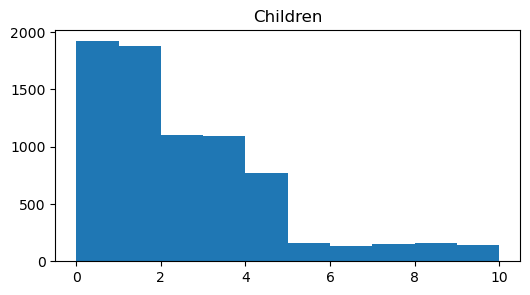

The histogram is skewed; therefore, we will use the median for imputation.


In [181]:
plt.figure(figsize=(6,3))
plt.hist(df['Children'])
plt.title('Children')

plt.show()
print('The histogram is skewed; therefore, we will use the median for imputation.')

In [182]:
median_children = df['Children'].median()
df['Children'].fillna(median_children, inplace=True)
print('Current Children Missing Data:', (10000 - df['Children'].value_counts().sum()))

Current Children Missing Data: 0


##### Age Column

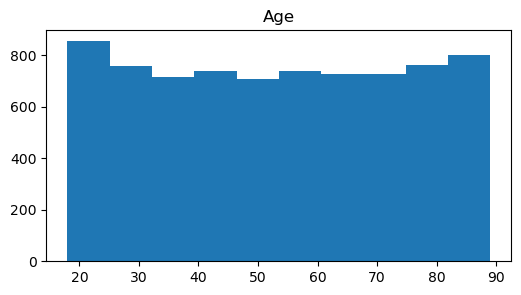

The histogram is almost universal therefore we will use mean for imputation.


In [183]:
plt.figure(figsize=(6,3))
plt.hist(df['Age'])
plt.title('Age')

plt.show()
print('The histogram is almost universal therefore we will use mean for imputation.')

In [184]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
df['Age'] = df['Age'].astype(int)
print('Current Age Missing Data:', (10000 - df['Age'].value_counts().sum()))

Current Age Missing Data: 0


##### Income Column

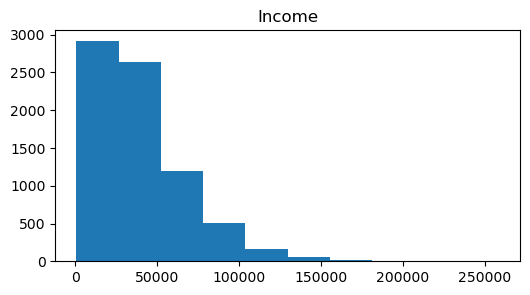

The histogram is skewed therefore we will use median for imputation.


In [185]:
plt.figure(figsize=(6,3))
plt.hist(df['Income'])
plt.title('Income')

plt.show()
print('The histogram is skewed therefore we will use median for imputation.')

In [186]:
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)
print('Current Income Missing Data:', (10000 - df['Income'].value_counts().sum()))

Current Income Missing Data: 0


##### Techie Column

In [187]:
techie_counts = df['Techie'].value_counts()
print(techie_counts)
print('Total Count:', techie_counts.sum())

No     6266
Yes    1257
Name: Techie, dtype: int64
Total Count: 7523


Techie countains: 'No', 'Yes', and 'NA' for no data. For this reason we will be imputing the data with the mode which in this case is 'No'.

In [188]:
common_techie = df['Techie'].mode()[0]
df['Techie'].fillna(common_techie, inplace=True)
print('Current Techie Missing Data:', (10000 - df['Techie'].value_counts().sum()))

Current Techie Missing Data: 0


###### Phone Column

In [189]:
phone_counts = df['Phone'].value_counts()
print(phone_counts)
print('Total Count:', phone_counts.sum())

Yes    8128
No      846
Name: Phone, dtype: int64
Total Count: 8974


Phone countains: 'No', 'Yes', and 'NA' for no data. For this reason we will be imputing the data with the mode which in this case is 'Yes'.

In [190]:
common_phone = df['Phone'].mode()[0]
df['Phone'].fillna(common_phone, inplace=True)
print('Current Phone Missing Data:', (10000 - df['Phone'].value_counts().sum()))

Current Phone Missing Data: 0


##### TechSupport Column

In [191]:
support_counts = df['TechSupport'].value_counts()
print(support_counts)
print('Total Count:', support_counts.sum())

No     5635
Yes    3374
Name: TechSupport, dtype: int64
Total Count: 9009


TechSupport countains: 'No', 'Yes', and 'NA' for no data. For this reason we will be imputing the data with the mode which in this case is 'No'.

In [192]:
common_support = df['TechSupport'].mode()[0]
df['TechSupport'].fillna(common_support, inplace=True)
print('Current TechSupport Missing Data:', (10000 - df['TechSupport'].value_counts().sum()))

Current TechSupport Missing Data: 0


##### Tenure Column

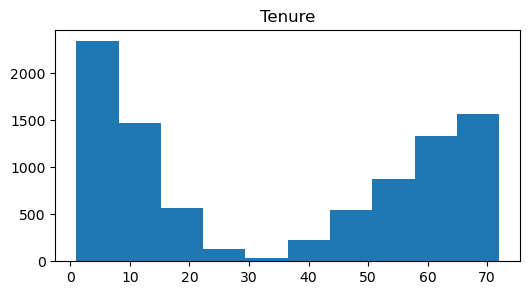

The histogram is bimodal therefore we will use median for imputation.


In [193]:
plt.figure(figsize=(6,3))
plt.hist(df['Tenure'])
plt.title('Tenure')

plt.show()
print('The histogram is bimodal therefore we will use median for imputation.')

In [194]:
median_tenure = df['Tenure'].median()
df['Tenure'].fillna(median_tenure, inplace=True)
print('Current Tenure Missing Data:', (10000 - df['Tenure'].value_counts().sum()))

Current Tenure Missing Data: 0


##### Bandwidth_GB_Year Column

5228.3700    2
5932.6800    2
5626.0940    2
6261.4190    2
6294.8450    2
            ..
1436.9460    1
585.4873     1
686.2609     1
1684.4860    1
5857.5860    1
Name: Bandwidth_GB_Year, Length: 8972, dtype: int64


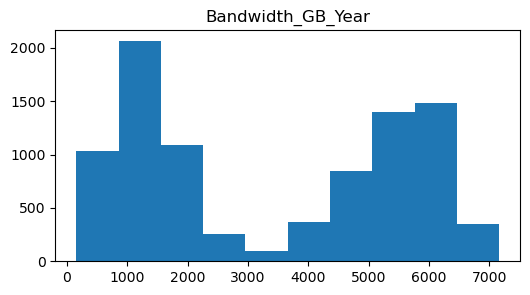

The histogram is bimodal therefore we will use median for imputation.


In [195]:
band_counts = df['Bandwidth_GB_Year'].value_counts()
print(band_counts)

plt.figure(figsize=(6,3))
plt.hist(df['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year')

plt.show()
print('The histogram is bimodal therefore we will use median for imputation.')

In [196]:
median_band = df['Bandwidth_GB_Year'].median()
df['Bandwidth_GB_Year'].fillna(median_band, inplace=True)
print('Current Bandwidth_GB_Year Missing Data:', (10000 - df['Bandwidth_GB_Year'].value_counts().sum()))

Current Bandwidth_GB_Year Missing Data: 0


##### All Missing Data has been successfully treated:

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  int32  
 15  Education           

#### Outlier Data Assessment and Treatment

Using Interquartile Range, and Boxplots:

In [198]:
num_cols = df.select_dtypes(include=[np.number]).columns

print(num_cols)

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


In [199]:
bad_cols = ['CaseOrder', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'Zip', 'Lat', 'Lng']

num_cols = list(set(num_cols) - set(bad_cols))

In [200]:
df_num = df[num_cols]
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
minq = Q1 - 1.5 * IQR
maxq = Q3 + 1.5 * IQR
outliers_iqr = (df_num < minq) | (df_num > maxq)
outliers_counts = outliers_iqr.sum()

print('Total count of outliers:\n\n', outliers_counts, '\n')
print('Min Values:\n', minq, '\n\n', 'Max Values:\n', maxq)
print('\nList of Columns with Outliers:\n')
outlier_list = []
for col, count in outliers_counts.items():
    if count > 0:
        outlier_list.append(col)
        print(col)

Total count of outliers:

 Outage_sec_perweek      539
Income                  759
Yearly_equip_failure     94
Population              937
MonthlyCharge             5
Age                       0
Tenure                    0
Bandwidth_GB_Year         0
Email                    38
Contacts                  8
Children                451
dtype: int64 

Min Values:
 Outage_sec_perweek          1.404440
Income                  -9104.313750
Yearly_equip_failure       -1.500000
Population             -17907.000000
MonthlyCharge              47.011534
Age                         5.000000
Tenure                    -68.479408
Bandwidth_GB_Year       -4919.100532
Email                       4.000000
Contacts                   -3.000000
Children                   -2.000000
dtype: float64 

 Max Values:
 Outage_sec_perweek         19.137566
Income                  78269.296250
Yearly_equip_failure        2.500000
Population              31813.000000
MonthlyCharge             297.836986
Age           

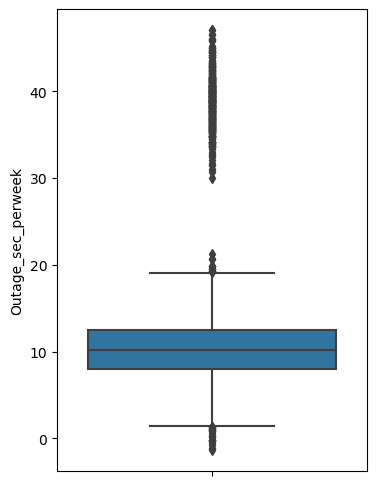

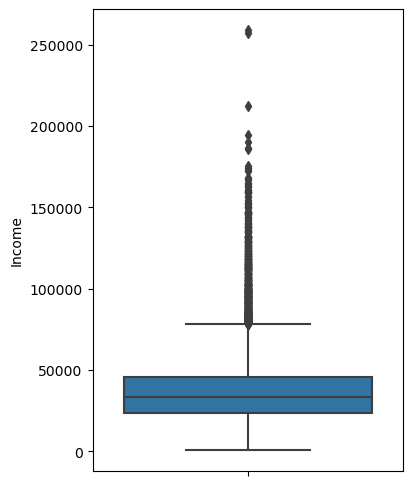

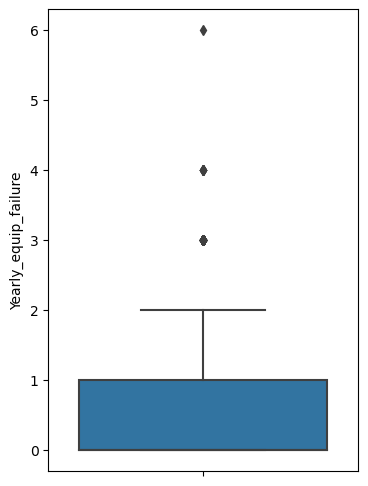

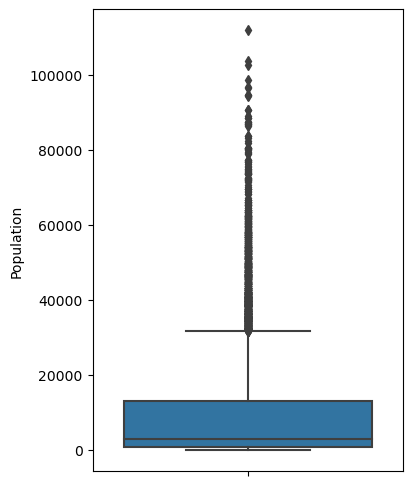

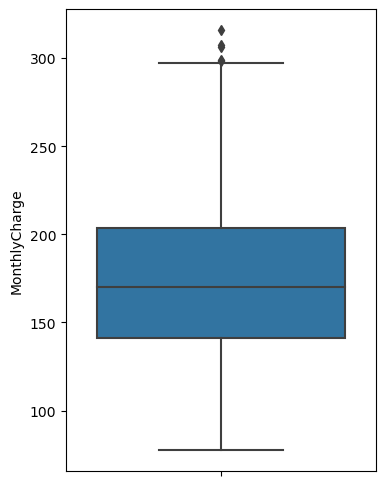

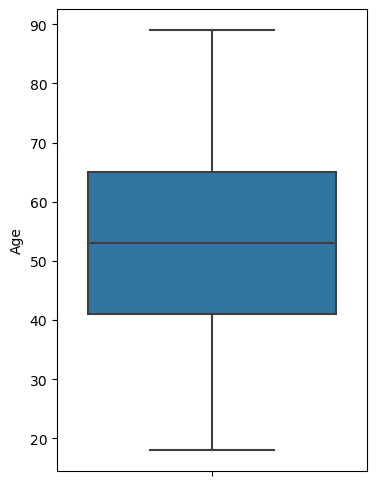

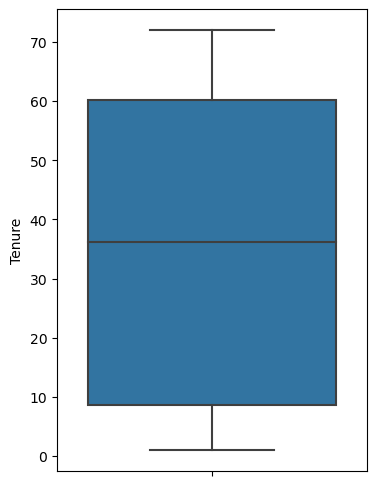

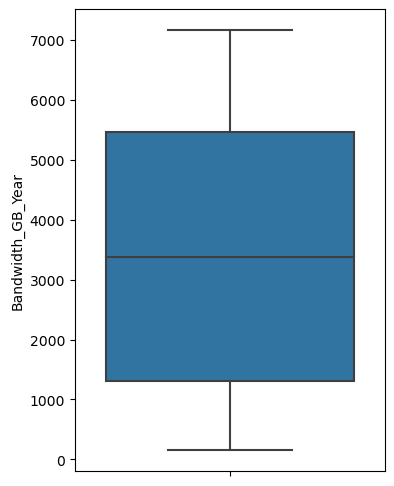

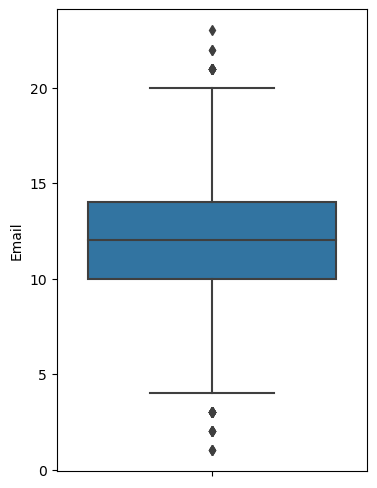

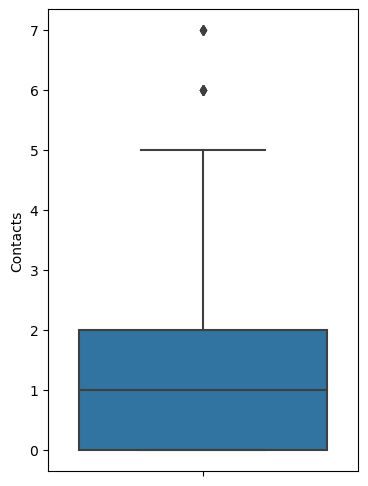

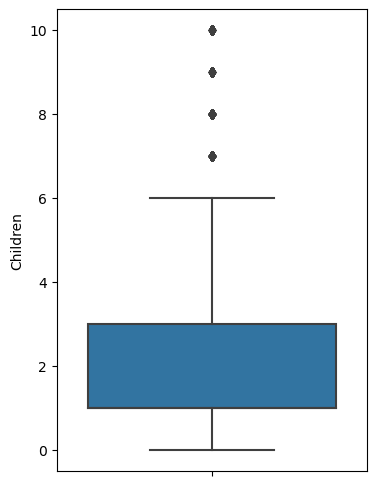

In [201]:
for col in num_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.show()

These boxplot graphs show the individual interquartile ranges of each numerical column of data within the csv.

##### Yearly_equip_failure Column

In [202]:
df['Yearly_equip_failure'].info()
df['Yearly_equip_failure'] = np.where((df['Yearly_equip_failure'] < minq['Yearly_equip_failure']) | (df['Yearly_equip_failure'] > maxq['Yearly_equip_failure']), np.nan, df['Yearly_equip_failure'])
print('\n')
df['Yearly_equip_failure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Yearly_equip_failure
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Yearly_equip_failure
Non-Null Count  Dtype  
--------------  -----  
9906 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [203]:
equip_median = df['Yearly_equip_failure'].median()
df['Yearly_equip_failure'].fillna(equip_median, inplace=True)
df['Yearly_equip_failure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Yearly_equip_failure
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


##### Income Column

In [204]:
income_outliers = df[((df['Income'] < minq['Income']) | (df['Income'] > maxq['Income']))]
print(minq['Income'], maxq['Income'])
print(income_outliers['Income'])

-9104.313749999994 78269.29624999998
12       83671.08
13      115114.57
15       89061.45
23       79699.62
46      132116.33
          ...    
9900     80884.80
9921    109058.00
9922     89514.55
9937     78958.46
9987    102629.60
Name: Income, Length: 759, dtype: float64


##### Outage_sec_perweek Column

In [205]:
outage_outliers = df[((df['Outage_sec_perweek'] < minq['Outage_sec_perweek']) | (df['Outage_sec_perweek'] > maxq['Outage_sec_perweek']))]
print(minq['Outage_sec_perweek'], maxq['Outage_sec_perweek'])
print(outage_outliers['Outage_sec_perweek'])

1.404439566250005 19.137566056249995
28      43.927052
36      44.725202
40      38.905335
61      39.883903
72      32.030945
          ...    
9895    40.684860
9907    38.524730
9945    39.337010
9950    40.974290
9980    30.732980
Name: Outage_sec_perweek, Length: 539, dtype: float64


##### Population Column

In [206]:
population_outliers = df[((df['Population'] < minq['Population']) | (df['Population'] > maxq['Population']))]
print(minq['Population'], maxq['Population'])
print(population_outliers['Population'])

-17907.0 31813.0
11      33372
16      50079
29      52484
44      35743
51      39649
        ...  
9936    38703
9979    32425
9987    87509
9996    77168
9998    35575
Name: Population, Length: 937, dtype: int64


#### Categorical Data Re-expressed Assessment and Treatment

Verify that the values are accurately placed into a categorical datatype, and verify if the need for re-expression is present.

In [207]:
all_cols = df.columns
cat_cols = list(set(all_cols) - set(num_cols))
df_cat = df[cat_cols]

for col in cat_cols:
    print(df[col].value_counts(), '\n')

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64 

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64 

3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: item6, dtype: int64 

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indi

From this data, we can see that we have several categorical columns. We can describe each as nominal or ordinal. After understanding the type of categorical variable, we can also choose a preferred encoding style ordinal encoding, label encoding, or one-hot encoding.

The following columns have these categorical types and encoding preferences:

* City : nominal type : label encoding
* State : nominal type : label encoding
* County : nominal type : label encoding
* Area : nominal type : one-hot or label encoding
* Timezone : nominal type : label encoding
* Job : nominal type : label encoding
* Education : ordinal type : ordinal encoding
* Employment : nominal type : label encoding
* Marital : nominal type : label encoding
* Gender : ordinal type : ordinal or label encoding
* Churn : ordinal type : ordinal or label encoding
* Techie : ordinal type : ordinal or label encoding
* Contract : nominal type : label or one-hot encoding
* Port_modem : ordinal type : ordinal or label encoding
* Tablet : ordinal type : ordinal or label encoding
* InternetService : nominal type : label or one-hot encoding
* Phone : ordinal type : ordinal or label encoding
* Multiple : ordinal type : ordinal or label encoding
* OnlineSecurity : ordinal type : ordinal or label encoding
* OnlineBackup : ordinal type : ordinal or label encoding
* DeviceProtection : ordinal type : ordinal or label encoding
* TechSupport : ordinal type : ordinal or label encoding
* StreamingTV : ordinal type : ordinal or label encoding
* StreamingMovies : ordinal type : ordinal or label encoding
* PaperlessBilling : ordinal type : ordinal or label encoding
* PaymentMethod : nominal type : label or one-hot encoding

##### Education Column
The column 'Education' will be encoded ordinally into another column called 'Education_number.'

In [208]:
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [209]:
df['Education_number'] = df['Education']
edu_dict = {'Education_number': {'No Schooling Completed': 0, 'Nursery School to 8th Grade': 1, '9th Grade to 12th Grade, No Diploma': 2, 'GED or Alternative Credential': 3, 'Regular High School Diploma': 4, 'Some College, Less than 1 Year': 5, 'Some College, 1 or More Years, No Degree': 6, 'Professional School Degree': 7, 'Associate\'s Degree': 8, 'Bachelor\'s Degree': 9, 'Master\'s Degree': 10, 'Doctorate Degree': 11}}
df.replace(edu_dict, inplace=True)
print(df['Education_number'].value_counts())

4     2421
9     1703
6     1562
2      870
10     764
8      760
5      652
1      449
3      387
7      198
0      118
11     116
Name: Education_number, dtype: int64


## Part III: Data Cleaning

### D. Data-Cleaning Process

#### D1. Findings from Data Quality Assessment:

##### Potential missing values:

* Children : 2495 missing values.
* Age : 2475 missing values.
* Income : 2490 missing values.
* Techie : 2477 missing values.
* Phone : 1026 missing values.
* TechSupport : 991 missing values.
* Tenure : 931 missing values.
* Bandwidth_GB_Year : 1021 missing values.

Here are counts for each column with missing data.

##### Possible outliers:

From our earlier assessment, there were many columns with outliers according to the interquartile range. The other columns that were not included did not need treatment and were retained. There were also a number of numerical columns that were categorical in nature, and not included. For example, the CaseOrder, Lat, Lng, items, and Zip columns did not need to be altered or deleted. Other reasons for retaining some numerical data as outliers are that the outlier data is desirable data like in email and the items columns. The following columns both had significant outliers according to inter-quartile range and visual inspection of their box plots.

* Income
* Outage_sec_perweek
* Population
* Yearly_equip_failure

All of these columns had significant amounts of outliers.

##### Inconsistencies in categorical data:

There didn't appear to be any large inconsistencies with the categorical data. That being said, none of the categorical data was encoded, which can make it more difficult to analyze or use in statistical modeling.

#### D2. Methods for Treating the Findings: 

Missing Values: Imputation

- Imputation:
    For values with universal or normal distribution imputation using the mean was used.
    For values with skewed or bimodal distribution imputation using the median was used.
    For categorical data imputation using the mode was used.
    - Children
    - Age
    - Income
    - Techie
    - Phone
    - TechSupport
    - Tenure
    - Bandwidth_GB_Year

Outliers: Imputation, Retention, or Exclusion 

- Imputation:
     For data that had a proportionally small amount of outliers where imputation of these outliers wouldn't significantly alter the distribution of data.
    - Yearly_equip_perweek

- Exclusion:
    For data where it was difficult to label the data as either acceptable or not acceptable.
    - Income
    - Outage_sec_perweek
    - Population

Categorical variables: Standardization via ordinal encoding, label encoding, or one-hot encoding. The Education column was encoded using ordinal encoding in order to further analyze the data. The educational data was ordinal in nature, and for that reason, ordinal encoding was chosen.

- Ordinal Encoding
    - Education

#### D3. Outcome Summary:

- Reduced missing data impacting analysis via imputation of mean, median, or mode.
- Controlled impact of outliers on statistical analysis via imputation, retention, or exclusion based on interquartile ranges.
- Consistent and clean categorical data encoded via ordinal encoding.

#### D4. See C4. for the Combined Assessment/Treatment Code

#### D5. Cleaned Data Set (CSV):

df.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D206\D206Final.csv')
income_outliers.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D206\incomeOutliers.csv')
outage_outliers.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D206\outageOutliers.csv')
population_outliers.to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D206\populationOutliers.csv')

* See the attached CSV for cleaned data
    * D206Final.csv
    * incomeOutliers.csv
    * outageOutliers.csv
    * populationOutliers.csv

#### D6. Limitations:

Imputation Might Introduce Bias:

Imputing missing values can introduce bias in the dataset. For instance, using the mean or median to fill in missing values can distort the original distribution of the data, especially if the missing values are not random.
This bias can affect the results of statistical tests on this data, potentially leading to inaccurate conclusions for the business.

Outlier Removal Might Lead to Loss of Valuable Information:

Removing outliers can sometimes remove valuable insights from the data, especially if those outliers are genuine and not due to data entry errors or noise.
Outliers can often indicate important phenomena or errors in the data collection process, and their removal can oversimplify the analysis.

Effect of Limitations on Analysis:

Biased imputation and outlier removal can skew the results of the analysis, leading to potentially misleading conclusions.
The conclusions of the findings may be compromised if the data no longer accurately represents the true data population due to these manipulations.

#### D7. Future Implications when Using this Data:

Biased Imputation Can Skew Analysis Results:

Future analyses using this dataset may inherit the same biases introduced by the imputation method. This can lead to errors in predictive modeling or statistical assessments.

Removing Outliers Could Oversimplify the Model:

By removing outliers, future models might miss unseen patterns or key insights that are crucial for understanding the broader context or more extreme cases.

## Part IV

### E. Principal Component Analysis (PCA)

#### E1. Primary Component Analysis, Variables Used, Loading Matrix:

##### Variables Selection:

- For the Principal Component Analysis (PCA), I focused exclusively on quantitative (continuous) variables from the dataset, as PCA is most effective with continuous data that exhibits variance. The variables used included metrics like 'Age', 'Income', 'Yearly Equipment Failure', and other similar numerical features that are listed below.

- After standardizing these continuous variables, I applied PCA to transform the data. The PCA loadings matrix was then generated, which illustrates how each original variable contributes to the principal components. The loading matrix (see below) is in a table with rows representing the principal components (PC0, PC1, etc.) and columns representing the original variables.

- Of the entire csv/dataframe provided, 1 columns were used. For a PCA, the data must be numeric or continuous data as well as non-categorical in nature, and therefore, only 11 columns of the original data were eligible for a PCA. The following columns were used:

In [210]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Outage_sec_perweek    10000 non-null  float64
 1   Income                10000 non-null  float64
 2   Yearly_equip_failure  10000 non-null  int64  
 3   Population            10000 non-null  int64  
 4   MonthlyCharge         10000 non-null  float64
 5   Age                   10000 non-null  int32  
 6   Tenure                10000 non-null  float64
 7   Bandwidth_GB_Year     10000 non-null  float64
 8   Email                 10000 non-null  int64  
 9   Contacts              10000 non-null  int64  
 10  Children              10000 non-null  float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 820.4 KB


###### Primary Component Analysis

In [211]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

In [212]:
pca = PCA(n_components=11)
principal_components = pca.fit_transform(df_num_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['pc' + str(i + 1) for i in range(len(pca.components_))])
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     10000 non-null  float64
 1   pc2     10000 non-null  float64
 2   pc3     10000 non-null  float64
 3   pc4     10000 non-null  float64
 4   pc5     10000 non-null  float64
 5   pc6     10000 non-null  float64
 6   pc7     10000 non-null  float64
 7   pc8     10000 non-null  float64
 8   pc9     10000 non-null  float64
 9   pc10    10000 non-null  float64
 10  pc11    10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [213]:
print('\nExplained Variance for the PCA\n\n', pca.explained_variance_ratio_, '\n')
print('\nPCA Dataframe Head\n\n', pca_df.info())


Explained Variance for the PCA

 [0.17244993 0.10289966 0.09527167 0.09300303 0.09126292 0.0905347
 0.08983337 0.08921718 0.08750588 0.07865242 0.00936924] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     10000 non-null  float64
 1   pc2     10000 non-null  float64
 2   pc3     10000 non-null  float64
 3   pc4     10000 non-null  float64
 4   pc5     10000 non-null  float64
 5   pc6     10000 non-null  float64
 6   pc7     10000 non-null  float64
 7   pc8     10000 non-null  float64
 8   pc9     10000 non-null  float64
 9   pc10    10000 non-null  float64
 10  pc11    10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB

PCA Dataframe Head

 None


##### Loading Matrix

In [214]:
loading_matrix = pd.DataFrame(pca.components_, columns=[f'PC{i + 1}' for i in range(len(pca_df.columns))], index=df_num.columns)
print('Loading Matrix\n\n', loading_matrix)

Loading Matrix

                            PC1       PC2       PC3       PC4       PC5  \
Outage_sec_perweek    0.022599  0.006197  0.015836 -0.000410  0.045221   
Income                0.706399 -0.004281  0.058207 -0.055172  0.696325   
Yearly_equip_failure  0.021625  0.241758  0.302058 -0.317127 -0.092961   
Population           -0.010069  0.178934  0.349379 -0.384422  0.040624   
MonthlyCharge         0.014757  0.767896 -0.574507 -0.037651  0.033253   
Age                   0.057495  0.414818  0.515659  0.658501 -0.053477   
Tenure                0.053024  0.000105  0.028153  0.434816  0.012068   
Bandwidth_GB_Year     0.016099 -0.210840  0.167224 -0.050178 -0.068953   
Email                 0.052074  0.313780  0.376851 -0.349257 -0.151394   
Contacts              0.700439 -0.069494 -0.127730  0.000863 -0.684597   
Children              0.000612  0.001165 -0.002464 -0.000976 -0.048335   

                           PC6       PC7       PC8       PC9      PC10  \
Outage_sec_perweek  

In [215]:
eigenvalues = pca.explained_variance_
components_to_keep = sum(eigenvalue > 1 for eigenvalue in eigenvalues)
print('Eigenvalues of PC1 through PC11: \n \n', eigenvalues)
print('\nPrimary Components to keep: ', components_to_keep)

Eigenvalues of PC1 through PC11: 
 
 [1.89713896 1.13200948 1.04809317 1.02313568 1.00399247 0.99598125
 0.98826592 0.98148714 0.96266098 0.86526309 0.10307196]

Primary Components to keep:  5


#### E2. Primary Component Retention:

- In our analysis, we conducted a Principal Component Analysis (PCA) in order to reduce the dimensionality of our dataset. However, not all components in the PCA are equally important. To determine the correct number of components to retain, we applied the Kaiser method, with which we only keep those components with eigenvalues greater than 1. This approach aims to retain components that account for more variance than an average single variable in the dataset. Based on this criteria, we decided to keep the first five principal components, as they are the most significant in terms of explained variance. These components effectively condense the information in the data while still capturing the majority of its variability.

    - The following Principal Components are most important to retain:
        - PC1
        - PC2
        - PC3
        - PC4
        - PC5

#### E3. Organizational Benefit from PCA:

- The PCA results offer multiple benefits to the organization:

        - Dimensionality Reduction: Reduces the complexity of data, making it more manageable for analysis. In our case, reducing numerous variables to a few principal components simplifies data visualization and interpretation.
        
        - Reducing Overfitting: PCA helps in reducing overfitting by eliminating redundant and less informative features. This leads to models that are better at generalizing to new data, as they learn from the most variance-explaining components rather than noise.

        - Addressing Multicollinearity: PCA transforms correlated variables into a set of uncorrelated principal components, effectively resolving issues of multicollinearity. This ensures independence among predictors, which is crucial for the reliability of linear models.

        - Improved Data Visualization: Lower-dimensional data is easier to visualize and understand. This can aid in discovering patterns and relationships that are not apparent in more complex data.

        - Enhanced Model Performance: By focusing on principal components, machine learning models can be more efficient and less prone to overfitting.

        - Noise Reduction: PCA can help in filtering out noise from the data by focusing on components that capture the most variance.


### F. Panopto Recording:

    * See attached Panopto Recording
    
        * D206 Final Recording

### G. Third-Party Code References:

No third-party code was used in the creation of this project.

### H. Source References:

No external sources were used in the creation of the content of this project.